<a href="https://colab.research.google.com/github/yunita-wjy/data-mining/blob/main/UTS_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TensorFlow
Framework open-source dari Google yang digunakan untuk membuat dan menjalankan model machine learning dan deep learning.
Fungsinya membantu komputer belajar dari data agar bisa menemukan pola, memprediksi, dan mengambil keputusan tanpa perlu diprogram manual.

**Kegunaan dalam data mining**: TensorFlow memproses data dalam bentuk tensor, melakukan perhitungan matematis, dan membangun model yang bisa mempelajari pola dari data.

*Tensor* : struktur data multidimensi (mirip array atau matriks).

TensorFlow membantu di tahap **analisis prediktif dan modeling** menggunakan teknik *machine learning, deep learning*

#Kelebihan

**Performa Tinggi (GPU & TPU Acceleration)**

TensorFlow bisa jalan di CPU, GPU, bahkan TPU (Tensor Processing Unit) — hardware khusus dari Google buat deep learning.
Untuk dataset besar (jutaan baris), TensorFlow bisa menyelesaikan model training lebih cepat, sehingga eksplorasi pola data jadi lebih efisien.

**Pipeline Data Otomatis dan Scalable**

Dengan modul tf.data, TensorFlow bisa langsung membaca data dari CSV, database, atau big data storage, lalu membuat pipeline otomatis (load → batch → shuffle → train).
Hal ini mempercepat proses data preparation sebelum mining.

## 1. Import Depedencies

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


## 2. Aplikasi penggunaan

A. Prediksi hubungan linear – Regresi


In [ ]:
# Data: y = 2x + 1
x_train = [1, 2, 3, 4, 5]
y_train = [3, 5, 7, 9, 11]

# Buat dataset dari (x, y)
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Optional: atur agar data diacak dan dibagi batch
dataset = dataset.shuffle(buffer_size=5).batch(1)

# Model regresi
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(optimizer='sgd', loss='mean_squared_error') #setting ML
model.fit(dataset, epochs=100, verbose=1) #training

# Prediksi: x = 10 → y = ?
y = model.predict(np.array([[10.0]]))  # Harusnya = 21.0
print("y = ", y)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 57.2137   
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4308
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1412
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0199    
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0414
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0491
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0227
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0282
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0249
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0273
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0262
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0138    
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0321
Epoch 16/100
5/5 ━━━━━━━━━━━━━━━━━

In [ ]:
# Load CSV langsung jadi dataset TensorFlow
dataset = tf.data.experimental.make_csv_dataset(
    file_pattern='all_seasons.csv',
    batch_size=8,
    label_name='weight',     # kolom target
    num_epochs=1,
    shuffle=True,
    ignore_errors=True       # biar gak crash kalau ada baris aneh
)

# Ambil hanya kolom numeric yang mau dipakai (misal 'height')
def pack_features(x, y):
    # Pastikan height di-cast ke float dan bentuknya (batch, 1)
    height = tf.cast(x['height'], tf.float32)
    height = tf.reshape(height, [-1, 1])
    y = tf.cast(y, tf.float32)
    return height, y

dataset = dataset.map(pack_features)

# Normalisasi fitur
normalizer = tf.keras.layers.Normalization(axis=-1)
height_ds = dataset.map(lambda x, y: x)
# Pastikan semua tensor dikonversi ke float
height_ds = height_ds.map(lambda x: tf.cast(x, tf.float32))

# Jalankan adapt — ini bagian yang dulu error
normalizer.adapt(height_ds)

# Bangun model sederhana
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mean_squared_error')

# Training
model.fit(dataset, epochs=100, verbose=1)

# Prediksi contoh input
height_input = 195
pred = model.predict(tf.constant([[height_input]], dtype=tf.float32))
print(f"Prediksi berat badan untuk tinggi {height_input} cm: {pred[0][0]:.2f} kg")

Epoch 1/100
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6535.4482
Epoch 2/100
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 98.0855
Epoch 3/100
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 58.5073
Epoch 4/100
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 51.0493
Epoch 5/100
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 50.4834
Epoch 6/100
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 49.5510
Epoch 7/100
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 49.5383
Epoch 8/100
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 49.6047
Epoch 9/100
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 50.2751
Epoch 10/100
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 49.6589
Epoch 11/100
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 48.8314
Epoch 12/100
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 50.1302
Epoch 13/100
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 49.4041
Epoch 14/100
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 50.0949

In [ ]:
datareg

,Unnamed: 0,player_name,team_abbreviation,age,height,weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,NaN,Germany,Undrafted,Undrafted,...,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20
11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,...,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20
11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,...,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20
11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,NaN,USA,Undrafted,Undrafted,...,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20


In [ ]:
df_sorted = datareg.sort_values(by='height', ascending=True)
df_sorted[(df_sorted['height']>= 190) & (df_sorted['height']<=200)]

,Unnamed: 0,player_name,team_abbreviation,age,height,weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
10274,10274,Andre Ingram,LAL,33.0,190.50,86.182480,American University,USA,Undrafted,Undrafted,...,0.0,0.5,0.0,9.6,0.059,0.053,0.184,0.000,0.000,2018-19
11119,11119,Malik Monk,CHA,22.0,190.50,90.718400,Kentucky,USA,2017,1,...,10.3,2.9,2.1,-10.5,0.021,0.108,0.220,0.530,0.168,2019-20
11120,11120,Malik Newman,CLE,23.0,190.50,86.182480,Kansas,USA,Undrafted,Undrafted,...,2.0,0.0,0.0,-30.4,0.000,0.000,0.571,0.347,0.000,2019-20
11124,11124,Marcus Smart,BOS,26.0,190.50,99.790240,Oklahoma State,USA,2014,1,...,13.3,3.7,4.9,7.0,0.021,0.085,0.186,0.519,0.215,2019-20
9176,9176,Kyrie Irving,CLE,25.0,190.50,87.543256,Duke,Australia,2011,1,...,25.2,3.2,5.8,5.1,0.023,0.075,0.302,0.580,0.278,2016-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10656,10656,Ignas Brazdeikis,NYK,21.0,198.12,100.243832,Michigan,Lithuania,2019,2,...,1.9,0.6,0.4,-7.1,0.036,0.068,0.218,0.351,0.114,2019-20
10276,10276,Andrew Harrison,NOP,24.0,198.12,96.615096,Kentucky,USA,2015,2,...,3.2,1.2,1.4,-5.5,0.032,0.074,0.171,0.443,0.194,2018-19
8419,8419,JR Smith,CLE,29.0,198.12,102.058200,NaN,USA,2004,1,...,12.1,3.1,2.8,2.8,0.017,0.102,0.191,0.538,0.145,2014-15
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97


In [ ]:
# 1. Load Data
datareg = pd.read_csv('all_seasons.csv', sep=',')

datareg = datareg.dropna(subset=['height', 'weight'])
x_train = datareg['height'].astype(float).values
y_train = datareg['weight'].astype(float).values

# dataset = tf.data.experimental.make_csv_dataset(
#     file_pattern='all_seasons.csv',   # nama file CSV
#     batch_size=8,                    # ukuran batch
#     label_name='weight',             # kolom target (y)
#     field_delim=';',                 # delimiter CSV
#     num_epochs=1,                    # berapa kali data dibaca
#     shuffle=True                     # acak data
# )

# Normalisasi
x_mean, x_std = np.mean(x_train), np.std(x_train)
y_mean, y_std = np.mean(y_train), np.std(y_train)
x_train = (x_train - x_mean) / x_std
y_train = (y_train - y_mean) / y_std

# Ubah jadi dataset TensorFlow
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Shuffle dan batching
dataset = dataset.shuffle(buffer_size=len(x_train)).batch(5).prefetch(tf.data.AUTOTUNE)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error') #setting ML

# Callback early stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

model1.fit(dataset, epochs=100, verbose=1,  callbacks=[early_stop]) #training

# Contoh prediksi: tinggi = 170 cm
height_input = 195
predicted_weight = model1.predict(np.array([[height_input]]))
print(f"Prediksi berat badan untuk tinggi {height_input} cm: {predicted_weight[0][0]:.2f} kg")

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2228/2228 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4718
Epoch 2/100
2228/2228 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3116
Epoch 3/100
2228/2228 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3093
Epoch 4/100
2228/2228 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3180
Epoch 5/100
2228/2228 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2980
Epoch 6/100
2228/2228 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3064
Epoch 7/100
2228/2228 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3001
Epoch 8/100
2228/2228 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3122
Epoch 9/100
2228/2228 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3151
Epoch 10/100
2228/2228 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3183
Epoch 11/100
2228/2228 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3066
Epoch 12/100
2228/2228 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3038
Epoch 13/100
2228/2228 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3099
Epoch 14/100
2228/2228 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3088
Epoch 15/100
2228/2228 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Prediksi berat badan untuk tinggi 195 cm: 136.99 kg



# Jenis Layer
untuk data biasa
```
tf.keras.layers.Dense(64) #64 neuron
```
untuk data gambar
```
tf.keras.layers.Conv2D(32, (3, 3))  # 32 filters size 3x3
```
untuk data waktu (time series)
```
tf.keras.layers.LSTM(50)  # 50 LSTM units
```

# Jenis loss

MSE - untuk regresi
```
loss='mean_squared_error'
```
klasifikasi binary
```
loss='binary_crossentropy'
```
klasifikasi multi-class
```
loss='categorical_crossentropy'
```


B. Market Basket Analysis – Association Rules



In [ ]:
class MarketBasketModel(tf.keras.Model):
    def __init__(self, input_dim, encoding_dim=6):
        super(MarketBasketModel, self).__init__()

        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(encoding_dim, activation='relu')
        ])

        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(input_dim, activation='sigmoid')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
# 1. Load Data
data = pd.read_csv('dataset MBA.csv', sep=';')
print(data, "\n")

# 2. Preprocess Data
print("# Preprocessing data... \n")

# Clean dan split Items List jadi list of items
data['items'] = data['Items List'].apply(lambda x: [item.strip() for item in x.split(',')])
print("Data setelah cleaning:")
print(data[['ID', 'items']], "\n")

# 3. Buat mapping item -> index
# Ambil semua item unik dari seluruh transaksi
all_items = sorted(set(item for sublist in data['items'] for item in sublist))
item_to_index = {item: i for i, item in enumerate(all_items)}
index_to_item = {i: item for item, i in item_to_index.items()}
n_items = len(all_items)

print(f"Total unique items: {n_items}")
print("Contoh mapping:", list(item_to_index.items())[:5], "\n")

   ID                                         Items List
0   1                       Cookies, Egg, Milk, Sandwich
1   2  Bottled Water, Burger, Chicken, Egg, Pizza, Salad
2   3       Beacon, Bottled Water, Egg, Sandwich, Yogurt
3   4                    Burger, Pie, Pizza, Salad, Soda
4   5         Burger, Ice Cream, Pie, Pizza, Salad, Soda
5   6      Chocolate Shake, Cookies, Egg, Milk, Sandwich
6   7     Beacon, Chocolate Shake, Cookies, Milk, Yogurt
7   8                              Beacon, Burger, Salad
8   9               Cookies, Egg, Milk, Sandwich, Yogurt
9  10      Chocolate Shake, Cookies, Egg, Milk, Sandwich 

# Preprocessing data... 

Data setelah cleaning:
   ID                                              items
0   1                     [Cookies, Egg, Milk, Sandwich]
1   2  [Bottled Water, Burger, Chicken, Egg, Pizza, S...
2   3     [Beacon, Bottled Water, Egg, Sandwich, Yogurt]
3   4                  [Burger, Pie, Pizza, Salad, Soda]
4   5       [Burger, Ice Cream, Pie, 

In [ ]:
def encode_transaction(t):
    vec = [0]*n_items
    for item in t:
        vec[item_to_index[item]] = 1
    return vec

In [ ]:
# 4. Encode transaksi ke one-hot vector
encoded = tf.constant([encode_transaction(t) for t in data['items']], dtype=tf.float32)
print("Encoded:")
print(list(item_to_index))
print(encoded)

# 5. initialize model
input_dim = n_items
model = MarketBasketModel(input_dim, encoding_dim=6)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Model Summary:")
model.build(input_shape=(None, input_dim))
model.summary()
print("\n")

Encoded:
['Beacon', 'Bottled Water', 'Burger', 'Chicken', 'Chocolate Shake', 'Cookies', 'Egg', 'Ice Cream', 'Milk', 'Pie', 'Pizza', 'Salad', 'Sandwich', 'Soda', 'Yogurt']
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.]], shape=(10, 15), dtype=float32)
Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'market_basket_model_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "market_basket_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_17 (Sequential)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_18 (Sequential)      │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 6. Training model
model.fit(encoded, encoded, epochs=20, batch_size=8)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.6926
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 0.6903
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 0.6892
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 0.6885
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 0.6869
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 0.6852
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 0.6832
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 0.6833
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 0.6821
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 0.6800
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 0.6787
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [ ]:
def recommend_products(input_items, top_k=3):
    # Create input vector
    input_vector = np.array([[1 if product in input_items else 0 for product in all_items]])

    # Get predictions
    predictions = model.predict(input_vector, verbose=0)[0]

    # Filter products yang belum dipilih
    available_products = [p for p in all_items if p not in input_items]
    available_indices = [i for i, p in enumerate(all_items) if p not in input_items]

    # Get top recommendations
    top_indices = np.argsort(predictions[available_indices])[-top_k:][::-1]
    top_products = [available_products[i] for i in top_indices]
    top_scores = [float(predictions[available_indices[i]]) for i in top_indices]
    top_scores = [round(score, 2) for score in top_scores]

    return list(zip(top_products, top_scores))

In [ ]:
# Tes rekomendasi untuk satu transaksi parsial
test_vector = encoded[0:1]  # ambil transaksi pertama
pred = model.predict(test_vector)

# Urutkan item dengan probabilitas tertinggi
sorted_idx = np.argsort(pred[0])[::-1]
print("Rekomendasi top item:")
for idx in sorted_idx[:5]:
    print(f"- {index_to_item[idx]} ({pred[0][idx]:.2f})")
print()

contoh_input = ['Yogurt']   # ubah sesuai produk dataset
print(f"Rekomendasi untuk {contoh_input}:")
print(recommend_products(contoh_input, top_k=3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Rekomendasi top item:
- Yogurt (0.55)
- Egg (0.54)
- Burger (0.53)
- Cookies (0.53)
- Bottled Water (0.53)

Rekomendasi untuk ['Yogurt']:
[('Bottled Water', 0.52), ('Cookies', 0.52), ('Burger', 0.51)]


C. Health Categories - Classification

In [ ]:
# Pengaturan
DATA_URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
COLUMN_NAMES = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
BATCH_SIZE = 32 # jumlah data yg diproses sekaligus dalam satu langkah penelitian
EPOCHS = 200 # berlatih mengulang data sebanyak 200 kali
SEED = 42 # setiap kode dijalankan, hasil acak

# Reproducibility
np.random.seed(SEED)
tf.random.set_seed(SEED)



In [ ]:
# 1. Download and load CSV
print("Loading dataset...")
df = pd.read_csv(DATA_URL, names=COLUMN_NAMES, header=None)
print("Loaded shape:", df.shape)
# Menampilkan semua baris (tanpa batas)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df, "\n")

Loading dataset...
Loaded shape: (768, 9)
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0

In [ ]:
# 2. Preprocessing
# Anggap 0 pada kolom tertentu adalah missing -> ganti dengan NaN
for c in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    if c in df.columns:
        df[c] = df[c].replace(0, pd.NA)

# Shuffle deterministik
df = df.sample(frac=1.0, random_state=SEED).reset_index(drop=True)

# Split 70/15/15
n = len(df)
n_train = int(0.7 * n) #untuk training
n_val = int(0.15 * n) # untuk menghindari overfitting
train_df = df.iloc[:n_train].reset_index(drop=True)
val_df = df.iloc[n_train:n_train + n_val].reset_index(drop=True)
test_df = df.iloc[n_train + n_val:].reset_index(drop=True) # untuk mengukur performa terakhir

# Pisah fitur dan label
# model belajar dari fitur X untuk memprediksi outcome Y
X_train_df = train_df.drop(columns=['Outcome'])
y_train = train_df['Outcome'].astype(int).to_numpy()
X_val_df = val_df.drop(columns=['Outcome'])
y_val = val_df['Outcome'].astype(int).to_numpy()
X_test_df = test_df.drop(columns=['Outcome'])
y_test = test_df['Outcome'].astype(int).to_numpy()

# Impute median berdasarkan training set (hindari leakage)
# Gunakan median untuk mengisi missing
medians = X_train_df.median()
X_train_df = X_train_df.fillna(medians)
X_val_df = X_val_df.fillna(medians)
X_test_df = X_test_df.fillna(medians)

# Convert ke numpy float32 / int32
X_train = X_train_df.to_numpy(dtype=np.float32)
X_val = X_val_df.to_numpy(dtype=np.float32)
X_test = X_test_df.to_numpy(dtype=np.float32)
y_train = y_train.astype(np.int32)
y_val = y_val.astype(np.int32)
y_test = y_test.astype(np.int32)

print(f"Split -> train: {X_train.shape[0]}, val: {X_val.shape[0]}, test: {X_test.shape[0]}")


Split -> train: 537, val: 115, test: 116


/tmp/ipython-input-3725679787.py:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_df = X_train_df.fillna(medians)
/tmp/ipython-input-3725679787.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_val_df = X_val_df.fillna(medians)
/tmp/ipython-input-3725679787.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_df = X_t

In [ ]:
# 3. Normalizer / Penyeimbang skala data sebelum model machine learning dilatih
# Membuat layer normalisasi dari TensorFlow Keras
# Fungsi: menyesuaikan skala tiap fitur agar punya mean=0 dan varians=1
normalizer = tf.keras.layers.Normalization(axis=-1)

# Adaptasi normalizer ke data training
# TensorFlow akan menghitung mean dan variance tiap fitur
# Pake X_train karena dihitung dari data pelatihan, bukan data validasi atau pengujian
normalizer.adapt(X_train)

# Tampilkan hasil normalisasi
print(">> Rata-rata (mean) tiap fitur:")
print(np.round(normalizer.mean.numpy(), 4))

print("\n>> Variansi (variance) tiap fitur:")
print(np.round(normalizer.variance.numpy(), 4))

# Uji hasil normalisasi pada beberapa data awal
X_train_norm = normalizer(X_train[:5])
print("\n>> 5 data pertama setelah normalisasi:")
print(np.round(X_train_norm.numpy(), 4))

# Verifikasi bentuk data
print("\nShape data setelah normalisasi:", X_train_norm.shape)
print("Normalisasi selesai ✅")

>> Rata-rata (mean) tiap fitur:
[[  3.8305 121.9013  72.7989  29.1732 142.4795  32.6736   0.4725  33.4376]]

>> Variansi (variance) tiap fitur:
[[1.142190e+01 9.344503e+02 1.451998e+02 7.937970e+01 7.596972e+03
  4.843830e+01 1.125000e-01 1.389388e+02]]

>> 5 data pertama setelah normalisasi:
[[ 0.6419 -0.7819 -1.2281  0.4295  0.5452  0.1906 -0.1268  0.8112]
 [-0.5416 -0.3239  0.1827  0.3173 -0.1948  0.4348 -0.9675 -1.0552]
 [-0.5416 -0.4548 -0.7302 -0.0194 -0.1948 -0.2692 -0.9377 -1.0552]
 [ 1.2337 -0.4875  0.5976 -0.0194 -0.1948 -1.16    1.1433  0.0477]
 [ 0.9378  0.4612  1.4275 -0.0194 -0.1948 -0.3985 -0.7827  1.4051]]

Shape data setelah normalisasi: (5, 8)
Normalisasi selesai ✅


In [ ]:
# 4. tf.data.datasets
# data pelatihan, validasi, dan pengujian diubah jadi format tf.data.Dataset (format data pipeline bawaan TensorFlow)
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(1024, seed=SEED) \
    .batch(BATCH_SIZE) \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)) \
    .batch(BATCH_SIZE) \
    .prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)) \
    .batch(BATCH_SIZE) \
    .prefetch(tf.data.AUTOTUNE)


In [ ]:
# 5. Model
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')   # inti klasifikasi -> probabilitas 0..1
])

model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

model.build(input_shape=(None, X_train.shape[1]))
print("\nArsitektur model singkat:")
model.summary()

# rumus param = (m x n) + n
# yg trainable: dense dan batchnorm
# non trainable: batchnormalization, layer spt normalization


Arsitektur model singkat:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,962 (11.57 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 145 (584.00 B)

In [ ]:
# 6. Train dengan callbacks
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=12,
    restore_best_weights=True,
    verbose=1
)

ckpt_path = "best_model.keras"  # langsung nama file aja
mc = tf.keras.callbacks.ModelCheckpoint(
    ckpt_path,
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

print("\nMulai training...")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[early, mc],
    verbose=2
)



Mulai training...
Epoch 1/200

Epoch 1: val_loss improved from inf to 0.67349, saving model to best_model.keras
17/17 - 3s - 191ms/step - accuracy: 0.5680 - auc: 0.5980 - loss: 0.7040 - val_accuracy: 0.6435 - val_auc: 0.6543 - val_loss: 0.6735
Epoch 2/200

Epoch 2: val_loss improved from 0.67349 to 0.60993, saving model to best_model.keras
17/17 - 0s - 7ms/step - accuracy: 0.6760 - auc: 0.7463 - loss: 0.5751 - val_accuracy: 0.6957 - val_auc: 0.7246 - val_loss: 0.6099
Epoch 3/200

Epoch 3: val_loss improved from 0.60993 to 0.57652, saving model to best_model.keras
17/17 - 0s - 7ms/step - accuracy: 0.7058 - auc: 0.7791 - loss: 0.5323 - val_accuracy: 0.7130 - val_auc: 0.7532 - val_loss: 0.5765
Epoch 4/200

Epoch 4: val_loss improved from 0.57652 to 0.55680, saving model to best_model.keras
17/17 - 0s - 6ms/step - accuracy: 0.7505 - auc: 0.8148 - loss: 0.4958 - val_accuracy: 0.7391 - val_auc: 0.7663 - val_loss: 0.5568
Epoch 5/200

Epoch 5: val_loss improved from 0.55680 to 0.53967, saving

In [ ]:
# 7. Evaluate pada test set

print("\nEvaluasi pada data uji:")
loss, acc, auc = model.evaluate(test_ds, verbose=0)
print(f"Loss: {loss:.4f} | Akurasi: {acc:.4f} | AUC: {auc:.4f}")

# prediksi probabilitas untuk seluruh test set
y_proba = model.predict(test_ds).ravel()
y_pred = (y_proba >= 0.5).astype(int)

cm = tf.math.confusion_matrix(y_test, y_pred, num_classes=2).numpy()
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0 # Dari semua yang dikira “diabetes”, berapa yang benar-benar diabetes?
recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0 # Dari semua pasien diabetes, berapa yang berhasil dikenali model?
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0 # Dari semua pasien sehat, berapa yang tidak salah dikira sakit?

print("\nConfusion Matrix:\n", cm)
#pasien sehat -> sehat    pasien sehat -> diabetes
#pasien diabetes -> sehat    pasien diabetes -> diabetes
print(f"Precision: {precision:.4f} | Recall (Sensitivitas): {recall:.4f} | Specificity: {specificity:.4f}")


Evaluasi pada data uji:
Loss: 0.4460 | Akurasi: 0.7586 | AUC: 0.8597
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Confusion Matrix:
 [[65  7]
 [21 23]]
Precision: 0.7667 | Recall (Sensitivitas): 0.5227 | Specificity: 0.9028


In [ ]:
# 8. Cetak semua prediksi
print("\n=== Hasil Prediksi untuk SEMUA Data Test ===")
for i in range(len(X_test)):
    p = float(model.predict(X_test[i:i+1])[0,0])
    print(f"Data {i:03d}: Prob={p:.3f} → Prediksi={'Sakit' if p>=0.5 else 'Sehat'} | Label Asli={'Sakit' if y_test[i]==1 else 'Sehat'}")


=== Hasil Prediksi untuk SEMUA Data Test ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Data 000: Prob=0.270 → Prediksi=Sehat | Label Asli=Sakit
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Data 001: Prob=0.542 → Prediksi=Sakit | Label Asli=Sakit
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Data 002: Prob=0.037 → Prediksi=Sehat | Label Asli=Sehat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Data 003: Prob=0.003 → Prediksi=Sehat | Label Asli=Sehat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Data 004: Prob=0.138 → Prediksi=Sehat | Label Asli=Sehat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Data 005: Prob=0.007 → Prediksi=Sehat | Label Asli=Sehat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Data 006: Prob=0.014 → Prediksi=Sehat | Label Asli=Sehat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Data 007: Prob=0.265 → Prediksi=Sehat | Label Asli=Sakit
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Data 008: Prob=0.644 → Prediksi=Sakit | Label Asli=Sakit
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Data 009: Prob=0.731 → Prediksi=Sakit | Label Asli=Sehat
1/1 

D. Discovering Shopper Groups with TensorFlow - Clustering

Tujuan: Analisis perilaku pengeluaran

In [ ]:
# Pengaturan dasar
URL = "https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv"
FEATURES = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
K = 5 # bagi data jadi 5 cluster
MAX_STEPS = 100 # batas iterasi maksimum untuk algoritma iteratif
TOL = 1e-4 # perubahan sekecil ini sudah dianggap stabil
SEED = 42

# Agar hasil reproducible
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
# 1. Load data & preprocessing
# Ambil data langsung dari URL
df = pd.read_csv(URL)
X = df[FEATURES].to_numpy(dtype=float)

# Standarisasi data (agar tiap fitur punya skala sama)
# mean = 0 dan std = 1
mean = X.mean(axis=0, keepdims=True)
std = X.std(axis=0, keepdims=True)
std[std == 0] = 1.0
X_std = ((X - mean) / std).astype(np.float32)

print("Data shape:", X_std.shape)
print("Fitur yang digunakan:", FEATURES)

print("\n📋 Semua data setelah standarisasi:")
for i, row in enumerate(X_std):
    vals = ", ".join([f"{name}={val:.3f}" for name, val in zip(FEATURES, row)])
    print(f"{i:03d} | {vals}")
print("-" * 60)


Data shape: (200, 3)
Fitur yang digunakan: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

📋 Semua data setelah standarisasi:
000 | Age=-1.425, Annual Income (k$)=-1.739, Spending Score (1-100)=-0.435
001 | Age=-1.281, Annual Income (k$)=-1.739, Spending Score (1-100)=1.196
002 | Age=-1.353, Annual Income (k$)=-1.701, Spending Score (1-100)=-1.716
003 | Age=-1.138, Annual Income (k$)=-1.701, Spending Score (1-100)=1.040
004 | Age=-0.563, Annual Income (k$)=-1.663, Spending Score (1-100)=-0.396
005 | Age=-1.209, Annual Income (k$)=-1.663, Spending Score (1-100)=1.002
006 | Age=-0.276, Annual Income (k$)=-1.624, Spending Score (1-100)=-1.716
007 | Age=-1.138, Annual Income (k$)=-1.624, Spending Score (1-100)=1.700
008 | Age=1.805, Annual Income (k$)=-1.586, Spending Score (1-100)=-1.832
009 | Age=-0.635, Annual Income (k$)=-1.586, Spending Score (1-100)=0.846
010 | Age=2.020, Annual Income (k$)=-1.586, Spending Score (1-100)=-1.405
011 | Age=-0.276, Annual Income (k$)=-1.586, Sp

In [ ]:
# 2. Implementasi KMeans dengan TensorFlow
def tf_kmeans(X_np, k, max_steps=100, tol=1e-4, seed=42):
    rng = np.random.RandomState(seed)
    X_tf = tf.constant(X_np, dtype=tf.float32)
    n = X_np.shape[0]

    # Inisialisasi centroid acak
    init_idx = rng.choice(n, size=k, replace=False)
    centroids = tf.Variable(tf.gather(X_tf, init_idx), dtype=tf.float32)

    for step in range(max_steps):
        # --- Step 1: Assign (hitung jarak ke setiap centroid) ---
        # nambah dimensi spy bisa pakai broadcasting
        expanded_x = tf.expand_dims(X_tf, 1)      # [n, 1, d]
        expanded_c = tf.expand_dims(centroids, 0) # [1, k, d]
        # hitung jarak kuadrat euclidean antara tiap titik dan tiap sentroid
        dists = tf.reduce_sum(tf.square(expanded_x - expanded_c), axis=2)  # [n, k]
        labels = tf.argmin(dists, axis=1, output_type=tf.int32)
        # untuk tiap titik, ambil indeks centroid dengan jarak paling kecil

        # --- Step 2: Update (rata-rata titik per cluster) ---
        new_centroids = []
        for j in range(k):
            mask = tf.equal(labels, j)
            count = tf.reduce_sum(tf.cast(mask, tf.int32)) # jumlah titik yg masuk cluster j
            def mean_cluster(): #ambil semua titik di cluster j dan hitung rata-rata
                pts = tf.boolean_mask(X_tf, mask)
                return tf.reduce_mean(pts, axis=0)
            def reinit(): # pilih titik acak dari seluruh data untuk jadi centroid baru jika cluster kosong
                return X_tf[int(rng.randint(0, n))]
            c_j = tf.cond(count > 0, mean_cluster, reinit)
            new_centroids.append(c_j)
        new_centroids = tf.stack(new_centroids, axis=0)

        # --- Step 3: Check pergeseran centroid ---
        shift = tf.reduce_max(tf.norm(new_centroids - centroids, axis=1))
        centroids.assign(new_centroids)
        if shift < tol:
            print(f"Converged at step {step+1}, shift={shift.numpy():.6f}")
            break

    # Final label assignment
    expanded_x = tf.expand_dims(X_tf, 1)
    expanded_c = tf.expand_dims(centroids, 0)
    dists = tf.reduce_sum(tf.square(expanded_x - expanded_c), axis=2)
    labels = tf.argmin(dists, axis=1, output_type=tf.int32)
    return labels.numpy(), centroids.numpy()


In [ ]:
# 3. Jalankan Clustering TensorFlow
labels, centroids = tf_kmeans(X_std, K, max_steps=MAX_STEPS, tol=TOL, seed=SEED)


Converged at step 9, shift=0.000000


In [ ]:
# 4. Evaluasi dan hasil
print("\n=== HASIL CLUSTERING ===")

# a) Ukuran cluster
unique, counts = np.unique(labels, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Cluster {u}: {c} data")

# b) Centroid standar & skala asli
centroids_orig = (centroids * std) + mean
print("\nCentroid dalam ruang standar:")
print(np.round(centroids, 3))
print("\nCentroid dalam skala asli:")
for i, c in enumerate(centroids_orig):
    vals = ", ".join([f"{name}={val:.2f}" for name, val in zip(FEATURES, c)])
    print(f"Cluster {i}: {vals}")

# c) Inertia (total jarak kuadrat ke centroid)
def inertia(X, labels, centroids):
    s = 0.0
    for i, c in enumerate(centroids):
        mask = labels == i
        if mask.sum() == 0: continue
        dif = X[mask] - c[None, :]
        s += (dif**2).sum()
    return s
inertia_val = inertia(X_std, labels, centroids)
print(f"\nInertia (total distance): {inertia_val:.4f}")

# d) Representative sample
print("\nRepresentative sample per cluster (terdekat dengan centroid):")
for i in range(K):
    mask = labels == i
    if mask.sum() == 0:
        print(f"Cluster {i}: (kosong)")
        continue
    dists = np.linalg.norm(X_std - centroids[i][None, :], axis=1)
    idx = np.argmin(dists)
    row = df.iloc[idx]
    print(f"Cluster {i}: idx={idx}, Age={row['Age']}, Income={row['Annual Income (k$)']}, Spending={row['Spending Score (1-100)']}")

# e) Semua data + cluster hasilnya
print("\n=== Semua Data dengan Label Cluster ===")
print("idx | " + " | ".join(FEATURES) + " | Cluster")
for i, row in df.iterrows():
    vals = " | ".join([str(row[f]) for f in FEATURES])
    print(f"{i:03d} | {vals} | {labels[i]}")


=== HASIL CLUSTERING ===
Cluster 0: 40 data
Cluster 1: 54 data
Cluster 2: 20 data
Cluster 3: 39 data
Cluster 4: 47 data

Centroid dalam ruang standar:
[[-0.429  0.975  1.216]
 [-0.981 -0.743  0.467]
 [ 0.531 -1.291 -1.236]
 [ 0.073  0.975 -1.197]
 [ 1.205 -0.236 -0.052]]

Centroid dalam skala asli:
Cluster 0: Age=32.87, Annual Income (k$)=86.10, Spending Score (1-100)=81.53
Cluster 1: Age=25.19, Annual Income (k$)=41.09, Spending Score (1-100)=62.24
Cluster 2: Age=46.25, Annual Income (k$)=26.75, Spending Score (1-100)=18.35
Cluster 3: Age=39.87, Annual Income (k$)=86.10, Spending Score (1-100)=19.36
Cluster 4: Age=55.64, Annual Income (k$)=54.38, Spending Score (1-100)=48.85

Inertia (total distance): 168.2476

Representative sample per cluster (terdekat dengan centroid):
Cluster 0: idx=175, Age=30, Income=88, Spending=86
Cluster 1: idx=45, Age=24, Income=39, Spending=65
Cluster 2: idx=34, Age=49, Income=33, Spending=14
Cluster 3: idx=166, Age=42, Income=86, Spending=20
Cluster 4: id



---


E. Network Traffic - Anomaly Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Network_Traffic.csv'

df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.0,0.834066,0.534891,0.0,False,True,True,False,False,False,False,False,False
1,0.527559,0.741288,59382,443,0.785714,0.0,0.147196,0.990757,0.0,False,True,False,False,False,True,False,True,False
2,0.226199,0.485116,65484,80,0.285714,0.0,0.855192,0.031781,0.0,False,True,False,False,True,False,False,False,False
3,0.573372,0.450965,51707,53,0.142857,0.0,0.153220,0.169958,0.0,False,False,False,True,False,False,False,False,False
4,0.651396,0.888740,26915,53,0.714286,0.0,0.923916,0.552053,0.0,True,False,False,True,False,False,False,True,False


In [ ]:
# Load CSV dan inspeksi awal
if 'label' not in df.columns:
    raise ValueError("Dataset harus punya kolom 'label' (0=normal, 1=anomaly).")

X = df.drop(columns=['label']).values.astype('float32')
y = df['label'].values.astype('int32')

In [ ]:
# 4. Normalisasi
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X)

X_norm = normalizer(X)

In [ ]:
# 5. Ambil hanya data normal untuk melatih Autoencoder
X_train = X_norm[y == 0]

print(f"\nData normal untuk training: {X_train.shape[0]} sampel")
print(f"Data anomali untuk testing: {(y==1).sum()} sampel")


Data normal untuk training: 900 sampel
Data anomali untuk testing: 100 sampel


In [ ]:
# 6. Bangun Autoencoder (TensorFlow)
input_dim = X_train.shape[1]
encoding_dim = input_dim // 2

encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(encoding_dim, activation='relu'),
    tf.keras.layers.Dense(encoding_dim // 2, activation='relu')
])

decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(encoding_dim, activation='relu'),
    tf.keras.layers.Dense(input_dim, activation='sigmoid')
])

autoencoder = tf.keras.Sequential([normalizer, encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mse')

print("\nModel summary (Autoencoder):")
autoencoder.summary()


Model summary (Autoencoder):


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_7 (Normalization) │ (1000, 17)             │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 4)              │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215 (864.00 B)

 Trainable params: 180 (720.00 B)

 Non-trainable params: 35 (144.00 B)

In [ ]:
# 7. Train autoencoder dengan data normal
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=64, validation_split=0.2, verbose=2)

Epoch 1/20
12/12 - 2s - 165ms/step - loss: 1.2093 - val_loss: 1.1715
Epoch 2/20
12/12 - 0s - 10ms/step - loss: 1.1893 - val_loss: 1.1529
Epoch 3/20
12/12 - 0s - 10ms/step - loss: 1.1699 - val_loss: 1.1324
Epoch 4/20
12/12 - 0s - 10ms/step - loss: 1.1474 - val_loss: 1.1068
Epoch 5/20
12/12 - 0s - 9ms/step - loss: 1.1202 - val_loss: 1.0758
Epoch 6/20
12/12 - 0s - 9ms/step - loss: 1.0885 - val_loss: 1.0411
Epoch 7/20
12/12 - 0s - 10ms/step - loss: 1.0547 - val_loss: 1.0064
Epoch 8/20
12/12 - 0s - 10ms/step - loss: 1.0224 - val_loss: 0.9761
Epoch 9/20
12/12 - 0s - 10ms/step - loss: 0.9953 - val_loss: 0.9527
Epoch 10/20
12/12 - 0s - 11ms/step - loss: 0.9748 - val_loss: 0.9360
Epoch 11/20
12/12 - 0s - 9ms/step - loss: 0.9604 - val_loss: 0.9248
Epoch 12/20
12/12 - 0s - 10ms/step - loss: 0.9506 - val_loss: 0.9173
Epoch 13/20
12/12 - 0s - 10ms/step - loss: 0.9437 - val_loss: 0.9121
Epoch 14/20
12/12 - 0s - 9ms/step - loss: 0.9387 - val_loss: 0.9084
Epoch 15/20
12/12 - 0s - 10ms/step - loss: 0.9

In [ ]:
# 8. Hitung reconstruction error untuk semua data
reconstructions = autoencoder.predict(X_norm)
errors = tf.reduce_mean(tf.math.squared_difference(X_norm, reconstructions), axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


In [ ]:
# 9. Tentukan ambang (threshold)
threshold = tf.math.reduce_mean(errors) + 2*tf.math.reduce_std(errors)
print(f"\nAmbang batas error (threshold): {threshold:.6f}")


Ambang batas error (threshold): 1.225212


In [ ]:
# 10. Label prediksi: > threshold = anomaly
pred_labels = tf.cast(errors > threshold, tf.int32)

In [ ]:
# 11. Evaluasi performa
# pastikan y dan pred_labels adalah tf.Tensor bertipe int32
# jika y adalah numpy array, jalankan dulu:
# y = tf.convert_to_tensor(y, dtype=tf.int32)

tp = tf.reduce_sum(tf.cast((pred_labels == 1) & (y == 1), tf.int32))
tn = tf.reduce_sum(tf.cast((pred_labels == 0) & (y == 0), tf.int32))
fp = tf.reduce_sum(tf.cast((pred_labels == 1) & (y == 0), tf.int32))
fn = tf.reduce_sum(tf.cast((pred_labels == 0) & (y == 1), tf.int32))

# cast ke float sebelum pembagian
tp_f = tf.cast(tp, tf.float32)
fp_f = tf.cast(fp, tf.float32)
fn_f = tf.cast(fn, tf.float32)

precision = tp_f / (tp_f + fp_f + 1e-7)
recall    = tp_f / (tp_f + fn_f + 1e-7)
f1        = 2.0 * precision * recall / (precision + recall + 1e-7)

# tampilkan hasil (konversi ke numpy untuk printing)
print("\nPerformance:")
print(f" Precision: {precision.numpy():.4f}")
print(f" Recall:    {recall.numpy():.4f}")
print(f" F1-score:  {f1.numpy():.4f}")


Performance:
 Precision: 0.0714
 Recall:    0.0200
 F1-score:  0.0312


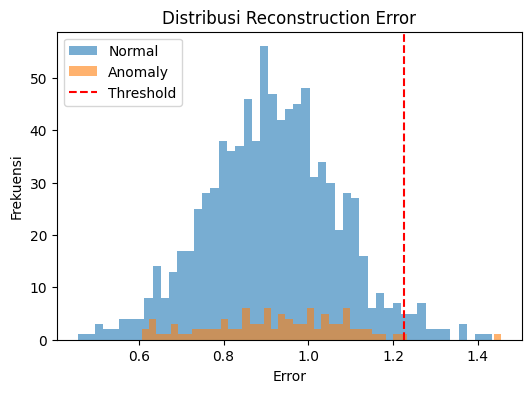

In [ ]:
# 12. Visualisasi error distribusi
plt.figure(figsize=(6,4))
plt.hist(errors[y==0], bins=50, alpha=0.6, label='Normal')
plt.hist(errors[y==1], bins=50, alpha=0.6, label='Anomaly')
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.legend(); plt.title('Distribusi Reconstruction Error')
plt.xlabel('Error'); plt.ylabel('Frekuensi')
plt.show()

F. Heart Disease - Pattern Recognation

In [ ]:
from google.colab import files
uploaded = files.upload()  # buka dialog upload


# Ambil nama file yang diupload pertama
csv_name = list(uploaded.keys())[0]
print(f"\nFile yang diupload: {csv_name}")

Saving heart.csv to heart (3).csv

File yang diupload: heart (3).csv



Distribusi label (target):
target
1    526
0    499
Name: count, dtype: int64


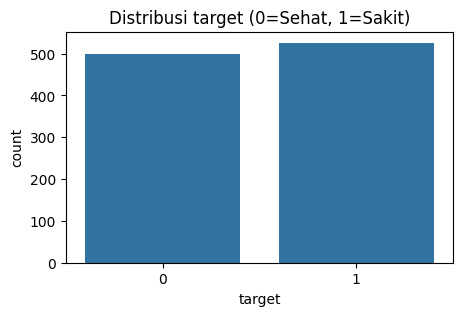

In [ ]:
#2. Load data
df = pd.read_csv(csv_name)
if 'target' not in df.columns:
    raise ValueError("File harus mengandung kolom 'target' (0=sehat, 1=sakit).")

# one-hot untuk kolom non-numeric (sederhana)
X = df.drop(columns=['target'])
if X.select_dtypes(exclude=[np.number]).shape[1] > 0:
    X = pd.get_dummies(X, drop_first=True)
feature_names = list(X.columns)
X = X.values.astype('float32')
y = df['target'].values.astype('int32')

if 'target' not in df.columns:
    raise ValueError("Tidak menemukan kolom 'target'. Pastikan file memiliki kolom target (0 = sehat, 1 = sakit).")

print("\nDistribusi label (target):")
print(df['target'].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x='target', data=df)
plt.title('Distribusi target (0=Sehat, 1=Sakit)')
plt.show()

In [ ]:
#3. Split Fitur
N = len(X)
idx = np.arange(N); np.random.shuffle(idx)
split = int(0.8 * N)
train_idx, test_idx = idx[:split], idx[split:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]
print(f"Data split -> train: {X_train.shape}, test: {X_test.shape}")

Data split -> train: (820, 13), test: (205, 13)


In [ ]:
# 4. Normalizer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train)  # fit pada data train
print("\nNormalisasi: contoh mean/std dari 5 fitur pertama:")
means = normalizer.mean.numpy().ravel(); vars_ = normalizer.variance.numpy().ravel()
stds = np.sqrt(vars_)
for i in range(min(5, len(means))):
    print(f"  {i:02d}. {feature_names[i]:20s} mean={means[i]:.3f}, std={stds[i]:.3f}")



Normalisasi: contoh mean/std dari 5 fitur pertama:
  00. age                  mean=54.470, std=9.040
  01. sex                  mean=0.690, std=0.462
  02. cp                   mean=0.952, std=1.038
  03. trestbps             mean=131.652, std=17.811
  04. chol                 mean=244.370, std=49.668


In [ ]:
# 5. tf.data pipeline
BATCH = 32
ds_train = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(BATCH).prefetch(tf.data.AUTOTUNE)
ds_test  = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH).prefetch(tf.data.AUTOTUNE)


In [ ]:
#6. Model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    normalizer,                               # preprocessing in-graph
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name='heart_simple_tf')

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.AUC(name='auc')])
print("\nModel summary:")
model.summary()


Model summary:


Model: "heart_simple_tf"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_6 (Normalization) │ (None, 13)             │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,036 (11.86 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 27 (112.00 B)

Epoch 1/30
46/46 - 2s - 45ms/step - accuracy: 0.7323 - loss: 0.5635 - val_accuracy: 0.7475 - val_loss: 0.5139
Epoch 2/30
46/46 - 0s - 7ms/step - accuracy: 0.8405 - loss: 0.3960 - val_accuracy: 0.8081 - val_loss: 0.4547
Epoch 3/30
46/46 - 0s - 7ms/step - accuracy: 0.8571 - loss: 0.3464 - val_accuracy: 0.8081 - val_loss: 0.4372
Epoch 4/30
46/46 - 0s - 7ms/step - accuracy: 0.8752 - loss: 0.3258 - val_accuracy: 0.7980 - val_loss: 0.4278
Epoch 5/30
46/46 - 1s - 14ms/step - accuracy: 0.8835 - loss: 0.2938 - val_accuracy: 0.8081 - val_loss: 0.4149
Epoch 6/30
46/46 - 1s - 14ms/step - accuracy: 0.8793 - loss: 0.2872 - val_accuracy: 0.8283 - val_loss: 0.4037
Epoch 7/30
46/46 - 0s - 5ms/step - accuracy: 0.8890 - loss: 0.2758 - val_accuracy: 0.8283 - val_loss: 0.3905
Epoch 8/30
46/46 - 0s - 5ms/step - accuracy: 0.8877 - loss: 0.2660 - val_accuracy: 0.8283 - val_loss: 0.3755
Epoch 9/30
46/46 - 0s - 4ms/step - accuracy: 0.8974 - loss: 0.2510 - val_accuracy: 0.8586 - val_loss: 0.3595
Epoch 10/30
46/4

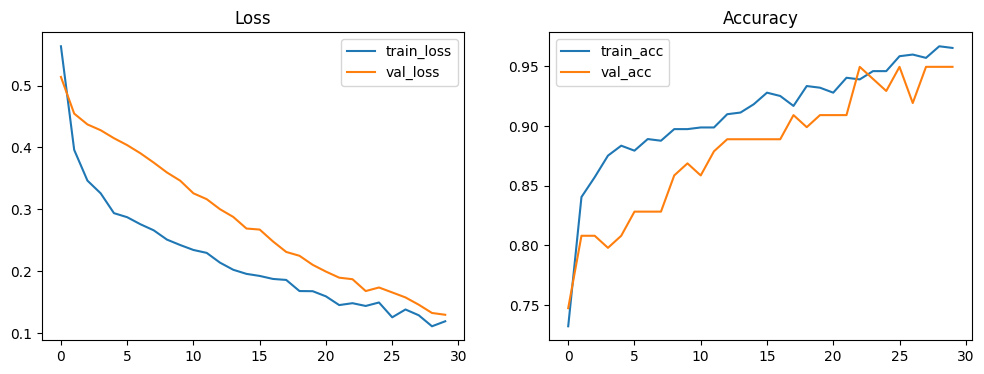

In [ ]:
# 7. Train
story = model.fit(ds_train, epochs=20, validation_data=ds_test, verbose=2)

In [ ]:
# 8. Evaluasi pada test set

loss, acc, auc = model.evaluate(ds_test, verbose=0)
print(f"\nTest loss={loss:.4f} | test accuracy={acc:.4f} | test AUC={auc:.4f}")

# Prediksi probabilitas -> numpy
y_prob = model.predict(ds_test).ravel()
y_pred = (y_prob >= 0.5).astype('int32')

# Confusion matrix via TF -> numpy
cm = tf.math.confusion_matrix(y_test, y_pred, num_classes=2).numpy()
print("\nConfusion matrix (rows=actual, cols=predicted):")
print(cm)

# Precision, recall, f1 (manual)
tp = int(cm[1,1]); tn = int(cm[0,0]); fp = int(cm[0,1]); fn = int(cm[1,0])
precision = tp / (tp+fp) if (tp+fp)>0 else 0.0
recall = tp / (tp+fn) if (tp+fn)>0 else 0.0
f1 = 2*precision*recall/(precision+recall) if (precision+recall)>0 else 0.0
print(f"\nPrecision={precision:.4f} | Recall={recall:.4f} | F1={f1:.4f}")


Test loss=0.6405 | test accuracy=0.5951 | test AUC=0.7986
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Confusion matrix (rows=actual, cols=predicted):
[[98  2]
 [81 24]]

Precision=0.9231 | Recall=0.2286 | F1=0.3664


In [ ]:
# 9. Contoh prediksi
print("\nContoh prediksi (prob, pred, true) — 8 sampel pertama dari test set:")
for i in range(min(8, len(y_test))):
    print(f" idx{i:02d}: prob={y_prob[i]:.3f} pred={y_pred[i]} true={y_test[i]}")


Contoh prediksi (prob, pred, true) — 8 sampel pertama dari test set:
 idx00: prob=0.387 pred=0 true=1
 idx01: prob=0.549 pred=1 true=1
 idx02: prob=0.366 pred=0 true=0
 idx03: prob=0.374 pred=0 true=0
 idx04: prob=0.328 pred=0 true=0
 idx05: prob=0.358 pred=0 true=0
 idx06: prob=0.530 pred=1 true=0
 idx07: prob=0.443 pred=0 true=1
